## Coding Challange - Clemente Cortile

## INDEX
<a id="Index"></a>
 ###   <left>QUESTION 1 </left><p>
<left><font size="+2"><a href="#Data Preparation">Data Preparation</a></font></left><p>
<left><font size="+2"><a href="#Data Exploration">Exploration & Descriptive Statistics</a></font></left><p>
<left><font size="+2"><a href="#A1">Equation Model</a></font></left><p>
<left><font size="+2"><a href="#A1">Testing Model</a></font></left><p>
<left><font size="+2"><a href="#AltSol">SVM Alternative Solution</a></font></left><p><br>
### <left>QUESTION 2 </left><p>   
<left><font size="+2"><a href="#Q2">Data Preparation</a></font></left><p>
<left><font size="+2"><a href="#DS2">Descriptive Stats and Visuals</a></font></left><p>
<left><font size="+2"><a href="#FEPR">Feature Engineering</a></font></left><p>
<left><font size="+2"><a href="#FEPR">Polynomial Regression - Scypy</a></font></left><p>
<left><font size="+2"><a href="#M2">Modeling - Scikit Learn Pipeline</a></font></left><p>
<left><font size="+2"><a href="#RES">Models Results - Benchmarks and Visuals</a></font></left><p>
<left><font size="+2"><a href="#CNC">Conclusions</a></font></left><p>



#### Question 1:
Given are two groups of 2-dimensional (x,y) coordinates.

group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]

group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]

Please determine an equation for a linear separator for these two groups of points. 

In [4]:
#Importing Libraries and Global settings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter('ignore', np.RankWarning)

import timeit
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

#NB: All custom functions are imported in the cells below for contextual purposes

<a id="Data Preparation"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

#### Data Preparation - Reshaping the data into a dataframe 

In [5]:
#Assigning the data to list of lists
group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]

group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]


In [6]:
#Converting the lists to dataframes using pandas constructors
g1 = pd.DataFrame(group1)
g2 = pd.DataFrame(group2)
#Encoding group information in a new column
g1['group'] = 'group 1'
g2['group'] = 'group 2'

None

In [7]:
#Concatenating the dataframes vertically
df = pd.DataFrame() # Declaring the dataframe to clean the memory on cell's reruns
df = pd.concat([g1, g2]).reset_index(drop=True)
#Renaming columns to coordinates
df = df.rename(columns={0:'X',1:'Y'})
#Keeping the extra dataframes to avoid using groupby statements
g1 = g1.rename(columns={0:'X',1:'Y'})
g2 = g2.rename(columns={0:'X',1:'Y'})
None

##### Notes | Rework Result:
Data has been reworked to a "melted" format. 
Row: Coordinates | Columns: Coordinate's infomation [X,Y,group]
<a id="Data Exploration"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

#### Data Exploration 

In [8]:
#A quick check for data integrity
df.head(4)

,X,Y,group
0,0.067,0.210,group 1
1,0.092,0.210,group 1
2,0.294,0.445,group 1
3,0.227,0.521,group 1


In [9]:
df.tail(4)

,X,Y,group
27,0.681,0.723,group 2
28,0.849,0.798,group 2
29,0.857,0.849,group 2
30,0.866,0.899,group 2


In [10]:
df.info()
#Descriptive statistics for the groups
g1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
X        31 non-null float64
Y        31 non-null float64
group    31 non-null object
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


,X,Y
count,16.000000,16.000000
mean,0.409687,0.667437
std,0.254197,0.224290
min,0.067000,0.210000
25%,0.216500,0.578000
50%,0.353000,0.739000
75%,0.588000,0.773000
max,0.849000,0.941000


In [11]:
g2.describe()

,X,Y
count,15.000000,15.00000
mean,0.558067,0.50140
std,0.241230,0.24435
min,0.118000,0.14300
25%,0.416000,0.32350
50%,0.605000,0.46200
75%,0.701500,0.69350
max,0.866000,0.89900


##### Notes | Descriptive Stats:
Lenght is not the same. Different means, same standard deviation.
<a id="Vis"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

#### Visualizing the data and plotting a line

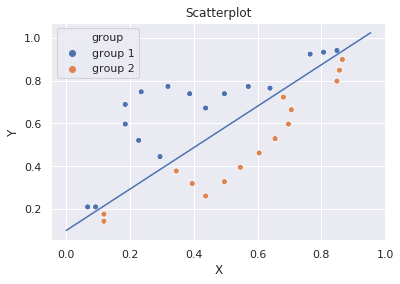

In [12]:

def scatter_line(df: pd.DataFrame, X:str, Y:str, label:str, coord: tuple, angle: int, length: float) -> None:
    """
    Given a dataframe in a melt format [X,Y,Category],
    Given a 2D coordinate and a slope
    Prints the scatterplot and the line
    :param df: scatterplot dataframe
    :param X: Dataframe column name
    :param Y: Dataframe column name
    :param Label: Dataframe column name
    :param coord: line origin
    :param angle: line slope
    :param length: line length
    :return: Void
    """
    #Scatterplot to visualize the 2D-coordinates, marking the groups by group type
    sns.scatterplot(data=df, x=X,y=Y,hue=label).set_title('Scatterplot')
    #Tuple to define origin of a line
    #x, y = (0,0.1)
    x = coord[0]
    y = coord[1]
    #Declaring integers to hold the value of the angle and the lenght of the line
    #angle = 47
    #length = 1.4
    # Find the end point
    endy = length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))
    # Plot the points
    plt.plot([x, endx], [y, endy])
    return None
#Testing the scatter line function to identify a good separator line
scatter_line(df, 'X', 'Y', 'group', (0,0.1), 47, 1.4)


##### Notes:
It looks like the bisector line of the quadrant would be a good separator for the two groups.
The Y = X bisector is not perfect for the separation though. Displacing y by +0.1 and adding two degree to the angle
creates a line that neatly separates the groups ( The cupid-arrow-like look helps drawing that conclusion).
<a id="A1"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Equation Model | Answer Question 1:
Given the point-slope equation form of a line, the equation that separates the group can be:
y = 0.47x + 0.1


##### Testing the answer with a program:
For every X in group 1, the equation will return a Y_pred that will always be smaller than the Y in Group 1 (Y_Group1 - Y_pred > 0)

In [13]:

def eq_1(x: float) -> float:
    """
    Given x
    Returns the solution of the equation y = .47x + .1
    :param x: dependent variable 
    :return: y as the independent variable
    """
    return (0.47*x + 0.1)

def line_check(data: pd.DataFrame, target: str, feature: str) -> None:
    """
    Given a dataframe, iterates over the selected columns and applies the eq_1 function
    Void return
    :param data: pandas dataframe
    :param target: column name
    :param feature: column name
    :return: 
    """

    flag = 0
    for i in range(0,len(g1)):
        if ((data[target][i] - eq_1(data[feature][i])) < 0):
            flag = 1
            print('ERROR - A point is below the separator line at', i)
    if (flag == 0):
        print('All points in group 1 are above the separator line')
    return None

#Performing the checks
line_check(g1,'Y','X')


All points in group 1 are above the separator line


<a id="AltSol"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

#### Question 1 - Alternative Solution
Support Vector Machine can be used to define a line that separates the two clusters.

The Linear Kernel does the best job at separating them as well. Comparing four methods down below:

In [14]:
from sklearn import svm
#Rearranging coordinates as features for the model
group_all = group1+group2
#Generating labels 0 for group1 and 1 for group 2
len_g1 = list(np.zeros(len(group1)))
len_g2 = list(np.ones(len(group2)))
#Concatenating the labels 
cat = len_g1 + len_g2

#Declaring the model object
clf = svm.SVC(gamma='scale', kernel='linear')
#Fitting the model
clf.fit(group_all, cat) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


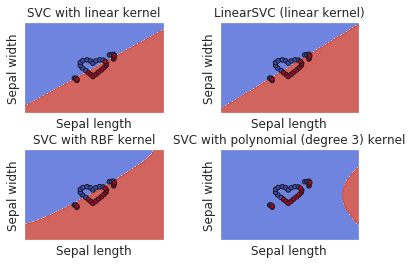

In [15]:

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = np.asarray(group_all)
y = np.asarray(cat)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()



##### Linear kernel's coefficients for the SVM: 

In [16]:
clf._get_coef()

array([[ 2.16945231, -2.37333565]])

<a id="Q2"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

#### Question 2

Given the two arrays X, Y

X = [38.0, 23.0, 49.0, 10.0, 10.0, 44.0, 14.0, 
       16.0, 48.0, 16.0, 36.0, 50.0, 44.0, 34.0,
       31.0, 33.0, 26.0, 9.0, 35.0, 43.0]

Y = [4.5, 3.8, 13.2, 1.8, -0.2, 10.4, 1.1, 1.3,
       12.5, 2.3, 7.5, 15.0, 8.9, 4.7,
        5.7, 6.8, 3.4, 0.7, 5.6, 9.3]

Please provide a model to estimate the target value Y given X



#####  Rearranging the data - Data Preparation

In [17]:
#Loading the data
X = [38.0, 23.0, 49.0, 10.0, 10.0, 44.0, 14.0, 
       16.0, 48.0, 16.0, 36.0, 50.0, 44.0, 34.0,
       31.0, 33.0, 26.0, 9.0, 35.0, 43.0]

Y = [4.5, 3.8, 13.2, 1.8, -0.2, 10.4, 1.1, 1.3,
       12.5, 2.3, 7.5, 15.0, 8.9, 4.7,
        5.7, 6.8, 3.4, 0.7, 5.6, 9.3]

#Applying the pandas constructor to the data
df1 = pd.DataFrame({'X':X, 'Y':Y})


<a id="DS2"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Descriptive Statistics and Visuals

In [18]:
df1.describe()

,X,Y
count,20.000000,20.000000
mean,30.450000,5.915000
std,14.043073,4.449988
min,9.000000,-0.200000
25%,16.000000,2.175000
50%,33.500000,5.150000
75%,43.250000,9.000000
max,50.000000,15.000000


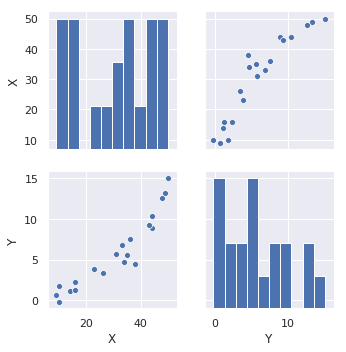

In [19]:
sns.pairplot(data=df1)
None


##### Notes:
Target value: Y | Features: X

The variables are not normally distributed. There's should be a linear correlation between X and Y, the relationship 
appears to be exponential. KS test and Pearson linear correlation test confirm these hypothesis.

Any linear model should achieve good results in predicting Y given X.



In [20]:
# Using KS test - Null Hypothesis: sample is normally distributed
# for [p-value < .05 ] Null is rejected -> X and Y are not normally distributed 
print(stats.kstest(df1['X'], 'norm'))
print(stats.kstest(df1['Y'], 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.7643339390536174, pvalue=1.0105049497222085e-12)


In [21]:
print('Pearson correlation coefficient:', stats.pearsonr(df1['X'],df1['Y'])[0])


Pearson correlation coefficient: 0.937108378859011


<a id="FEPR"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Feature Engineering

Performing transformation operations on the feature X to build a polynomial model.
The classic OLS estimator from scypy package will be used for the first model.

In [22]:
#Using numpy to generate a squared column of X
df1['X^2'] = np.power(df1['X'], 2)

#Loading the data as np arrays for library compatibility
X = df1['X'].values.reshape(-1,1)
y = df1['Y'].values.reshape(-1,1)

##### Modeling 1 - Scypy Polynomial Regression

Using Scypy to implement the model. SSR, SST and coefficient of determination are coded manually.


2nd Degree Polynomial model | R-Squared: 0.9413


/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


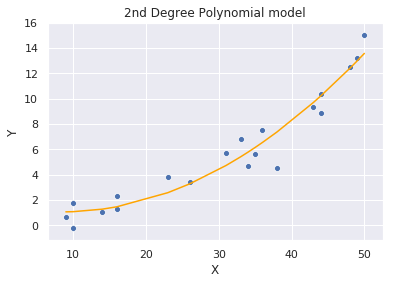

In [23]:
#Fitting a polinomial model for prediction
z = np.polyfit(df1['X'].values, y, 2)
#Using poly1d to apply polynomial
f = np.poly1d(z.reshape(1,-1)[0])

#Computing Predictions and Sum of Residuals squared and Total sum of squares
y_mean = df1['Y'].mean()
y_pred = []
temp_res = 0
y_tot = 0
j = 0
for i in df1['X']:
    y_pred.append(f(i))
    temp_res = ((f(i)-df1['Y'][j])**2) + temp_res
    y_tot = ((df1['Y'][j]-y_mean)**2) + y_tot
    j += 1

#Computing R-Squared
r_2 = 1 - (temp_res/y_tot )
print('2nd Degree Polynomial model | R-Squared:', round(r_2,4))
#Attaching predictions column to dataframe
df1['y_pred'] = y_pred
#Plotting Visuals
sns.lineplot(data=df1, x='X',y='y_pred', c='orange').set_title('2nd Degree Polynomial model')
sns.scatterplot(data=df1, x='X',y='Y')
None

<a id="M2"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Modeling 2 - Scikit Learn Pipeline

Setting up pipelines to test a set of models: Linear Regression (OLS), KNNregression, and
RandomForestRegression. 

The data will be scaled and normalized before training.
A Simple train-test split will be performed. Test size = 33%

Accuracy scores are reported for each model at different training sample sizes, 


In [24]:
#LinReg Pipeline
pipe_lin = Pipeline([
    ('Scaling', StandardScaler()),
    ('LinReg', LinearRegression()),
])
#KNN Pipeline
pipe_KNN = Pipeline([
    ('Scale', StandardScaler()),
    ('KNN', KNeighborsRegressor(n_neighbors=2)),
])
#Random Forest Regression Pipeline
pipe_RFreg = Pipeline([
    ('Scaling', StandardScaler()),
    ('RFreg', RandomForestRegressor()),
])



In [25]:
#Defining a function to run the pipelines and return the accuracy score.
def run_pipe(pipe_name, X, y):
    l = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    pipe_name.fit(X_train, y_train)
    
    l.append(abs(y_test - pipe_name.predict(X_test)))
    mas = (np.array(l).mean())

    return (pipe_name.score(X ,y),mas) 



In [26]:
#Benchmarking Model Consistency wrt sample size
start = timeit.default_timer()
#Declaring holder variables
l_lin = []
l_KNN = []
l_RFreg = []
l_lin_res = []
l_KNN_res = []
l_RFreg_res = []
l_X = []
counter = 1
#Looping over pipelines, feeding different sample sizes
for n in range(3,len(X),2):
    
    X1 = X[:n]
    y1 = y[:n]

    #l_lin.append(run_pipe(pipe_lin, X1, y1)[0])
    #l_KNN.append(run_pipe( pipe_KNN, X1, y1)[0])
    #l_RFreg.append(run_pipe(pipe_RFreg, X1, y1)[0])
    
    #Running pipelines once per sample. Storing results to temp variables
    temp_lin = run_pipe(pipe_lin, X1, y1)
    temp_KNN = run_pipe( pipe_KNN, X1, y1)
    temp_RFreg = run_pipe(pipe_RFreg, X1, y1)
    
    #Appending results
    l_lin.append(temp_lin[0])
    l_KNN.append(temp_KNN[0])
    l_RFreg.append(temp_RFreg[0])
    l_lin_res.append(temp_lin[1])
    l_KNN_res.append(temp_KNN[1])
    l_RFreg_res.append(temp_RFreg[1])
    
    #Checks
    l_X.append(len(X1))
    print(counter, len(X1))
    counter += 1


stop = timeit.default_timer()

print('Run Time: ', stop - start)

1 3
2 5
3 7
4 9
5 11
6 13
7 15
8 17
9 19
Run Time:  0.31185191899976417


/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/home/clemente/anaconda3/envs/galileo/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d arr

In [27]:

#Repacking the data to dictionary and then dataframes for melting and plotting
d = {
    'OLS score': l_lin,
    'KNN score': l_KNN,
    'RF score': l_RFreg,
    'n': l_X,
    'OLS MAE': l_lin_res,
    'KNN MAE': l_KNN_res,
    'RFreg MAE': l_RFreg_res
    }

df_r1 = pd.DataFrame(d)
#df_r2 = pd.DataFrame(d)

<a id="RES"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Models Results - Benchmarks and visuals

n: sample size, MAE = mean absolute error wrt to actual values


In [28]:
df_r1

,OLS score,KNN score,RF score,n,OLS MAE,KNN MAE,RFreg MAE
0,0.593276,-0.154993,-0.371803,3,4.723077,5.050000,7.760000
1,0.729889,0.146585,0.557421,5,3.109341,4.525000,5.090000
2,0.846425,0.691214,0.701177,7,1.325114,2.516667,5.822222
3,0.889167,0.755731,0.625116,9,1.074547,2.983333,6.025556
4,0.894318,0.935165,0.676568,11,1.194612,0.612500,5.780000
5,0.880028,0.890307,0.820350,13,2.105201,2.020000,5.668467
6,0.870600,0.935898,0.876212,15,1.611450,1.200000,4.377867
7,0.821429,0.906271,0.944497,17,2.251066,1.625000,4.786296
8,0.865805,0.893872,0.903077,19,1.300807,1.985714,3.572449


In [29]:
df_m1 = pd.melt(df_r1, value_vars=['OLS score','KNN score', 'RF score'], id_vars=['n'])

In [30]:
df_m1 = df_m1.rename(columns={'variable':'model','values':'accuracy'})

Text(0.5, 1.0, 'Sample Consistency Benchmark - Model Accuracy VS Sample Size')

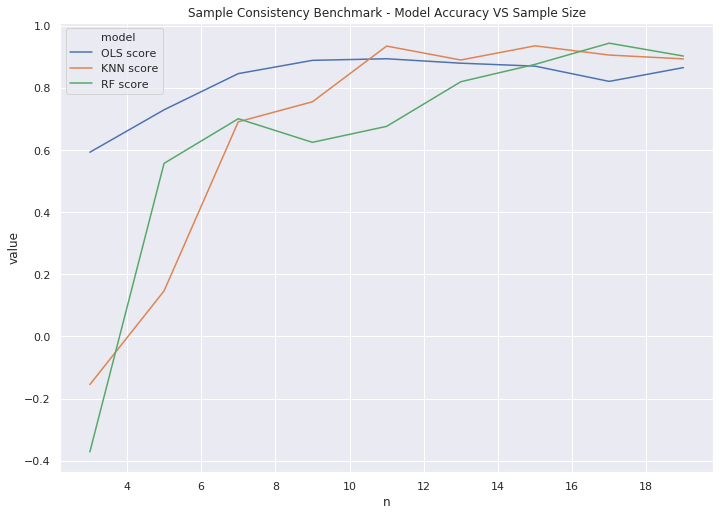

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_m1,y='value',x='n',hue='model').set_title('Sample Consistency Benchmark - Model Accuracy VS Sample Size')

In [32]:
df_m2 = pd.melt(df_r1, value_vars=['OLS MAE','KNN MAE', 'RFreg MAE'], id_vars=['n'])

In [33]:
df_m2 = df_m2.rename(columns={'variable':'model','values':'MAE'})

Text(0.5, 1.0, 'Sample Consistency Benchmark - Model MAE VS Sample Size')

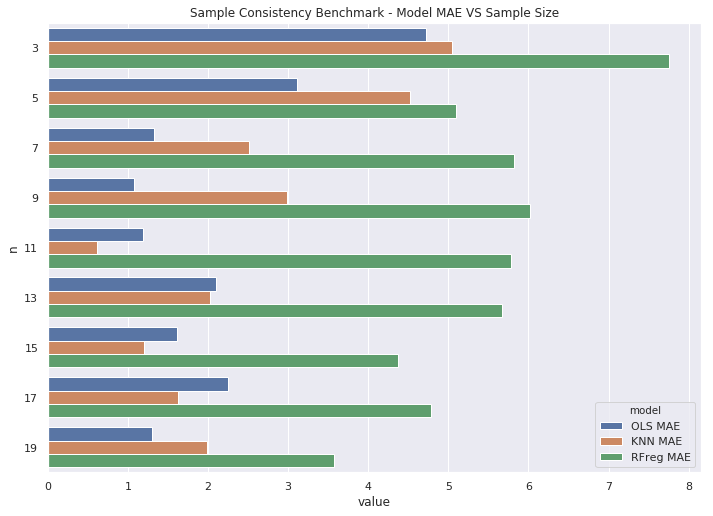

In [34]:
sns.barplot(data=df_m2, x='value', y='n',hue='model', orient='h').set_title('Sample Consistency Benchmark - Model MAE VS Sample Size')


<a id="CNC"></a>
<div style="text-align: right"> <a href="#Index">Back to Index</a> </div>

##### Conclusions:

The benchmark results show how OLS Models performs better than KNN and RF ones for smaller sample sizes.
OLS consistency lineplot presents less variability than the other model. MAE are also lower for all sample sizes. 
